In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

from sklearn.neighbors import NearestNeighbors

## Data and labels 
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [2]:
fname,fnamey="x_12d.dat","y_12d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  L=D=",D)
x=data
def distance(A,B):
    return np.linalg.norm(B-A)

N= 600   L=D= 12


## Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

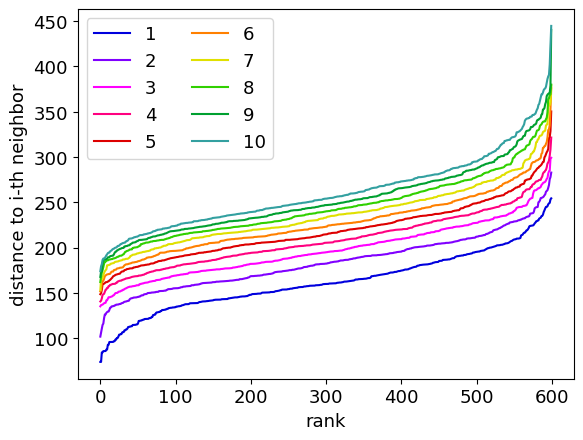

mean minimum distance between points:  162.34622464324366


In [3]:
nn = 10
nbrs = NearestNeighbors(n_neighbors=nn+1).fit(x) #, algorithm='ball_tree'
d, ind = nbrs.kneighbors(x)
dd=d.T
# note: dd[0] has a trivial set of zeros
listc= ["#0000DD","#8000FF","#FF00FF","#FF0080","#DD0000",
        "#FF8000","#E0E000","#30D000","#00A030","#33A0A0"]
for i in range(1,nn+1):
    plt.plot(np.sort(dd[i]),c=listc[i-1],label=str(i))
    plt.xlabel("rank")
    plt.ylabel("distance to i-th neighbor")
plt.legend(ncol=2)
plt.show()
mean_min_dist = np.mean(dd[1])
print("mean minimum distance between points: ",mean_min_dist)

## t-SNE visualization, for true labels

/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


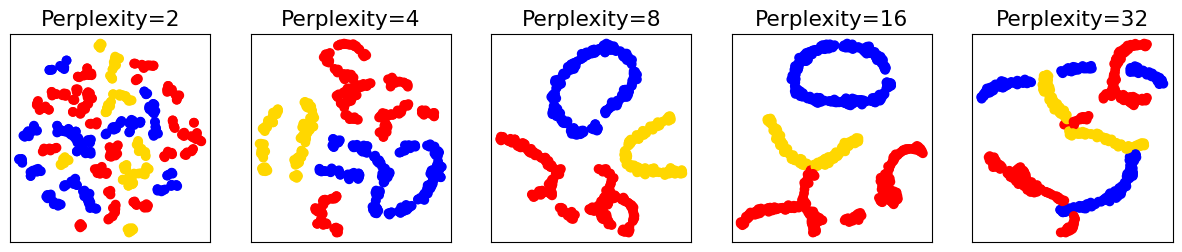

In [4]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [2, 4, 8, 16, 32]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

## Different random initial states (random_state=i)

/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


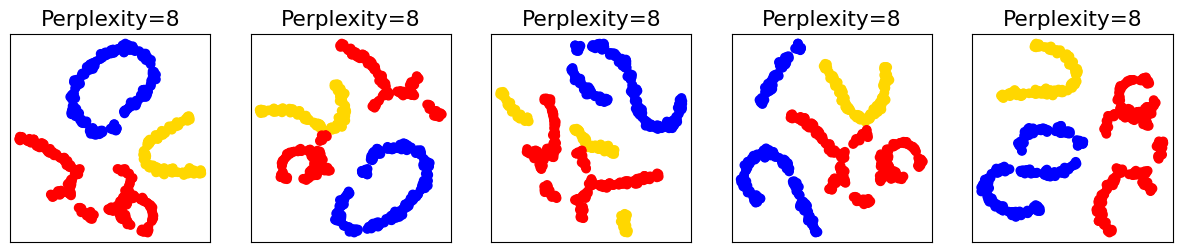

In [5]:
n_samples = N
n_components = 2 
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]

perplexity= 8

for i in range(5):
    np.random.seed(i) 
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, 
                         init='random',random_state=i, 
                         perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

## DBSCAN: find labels by applying clustering

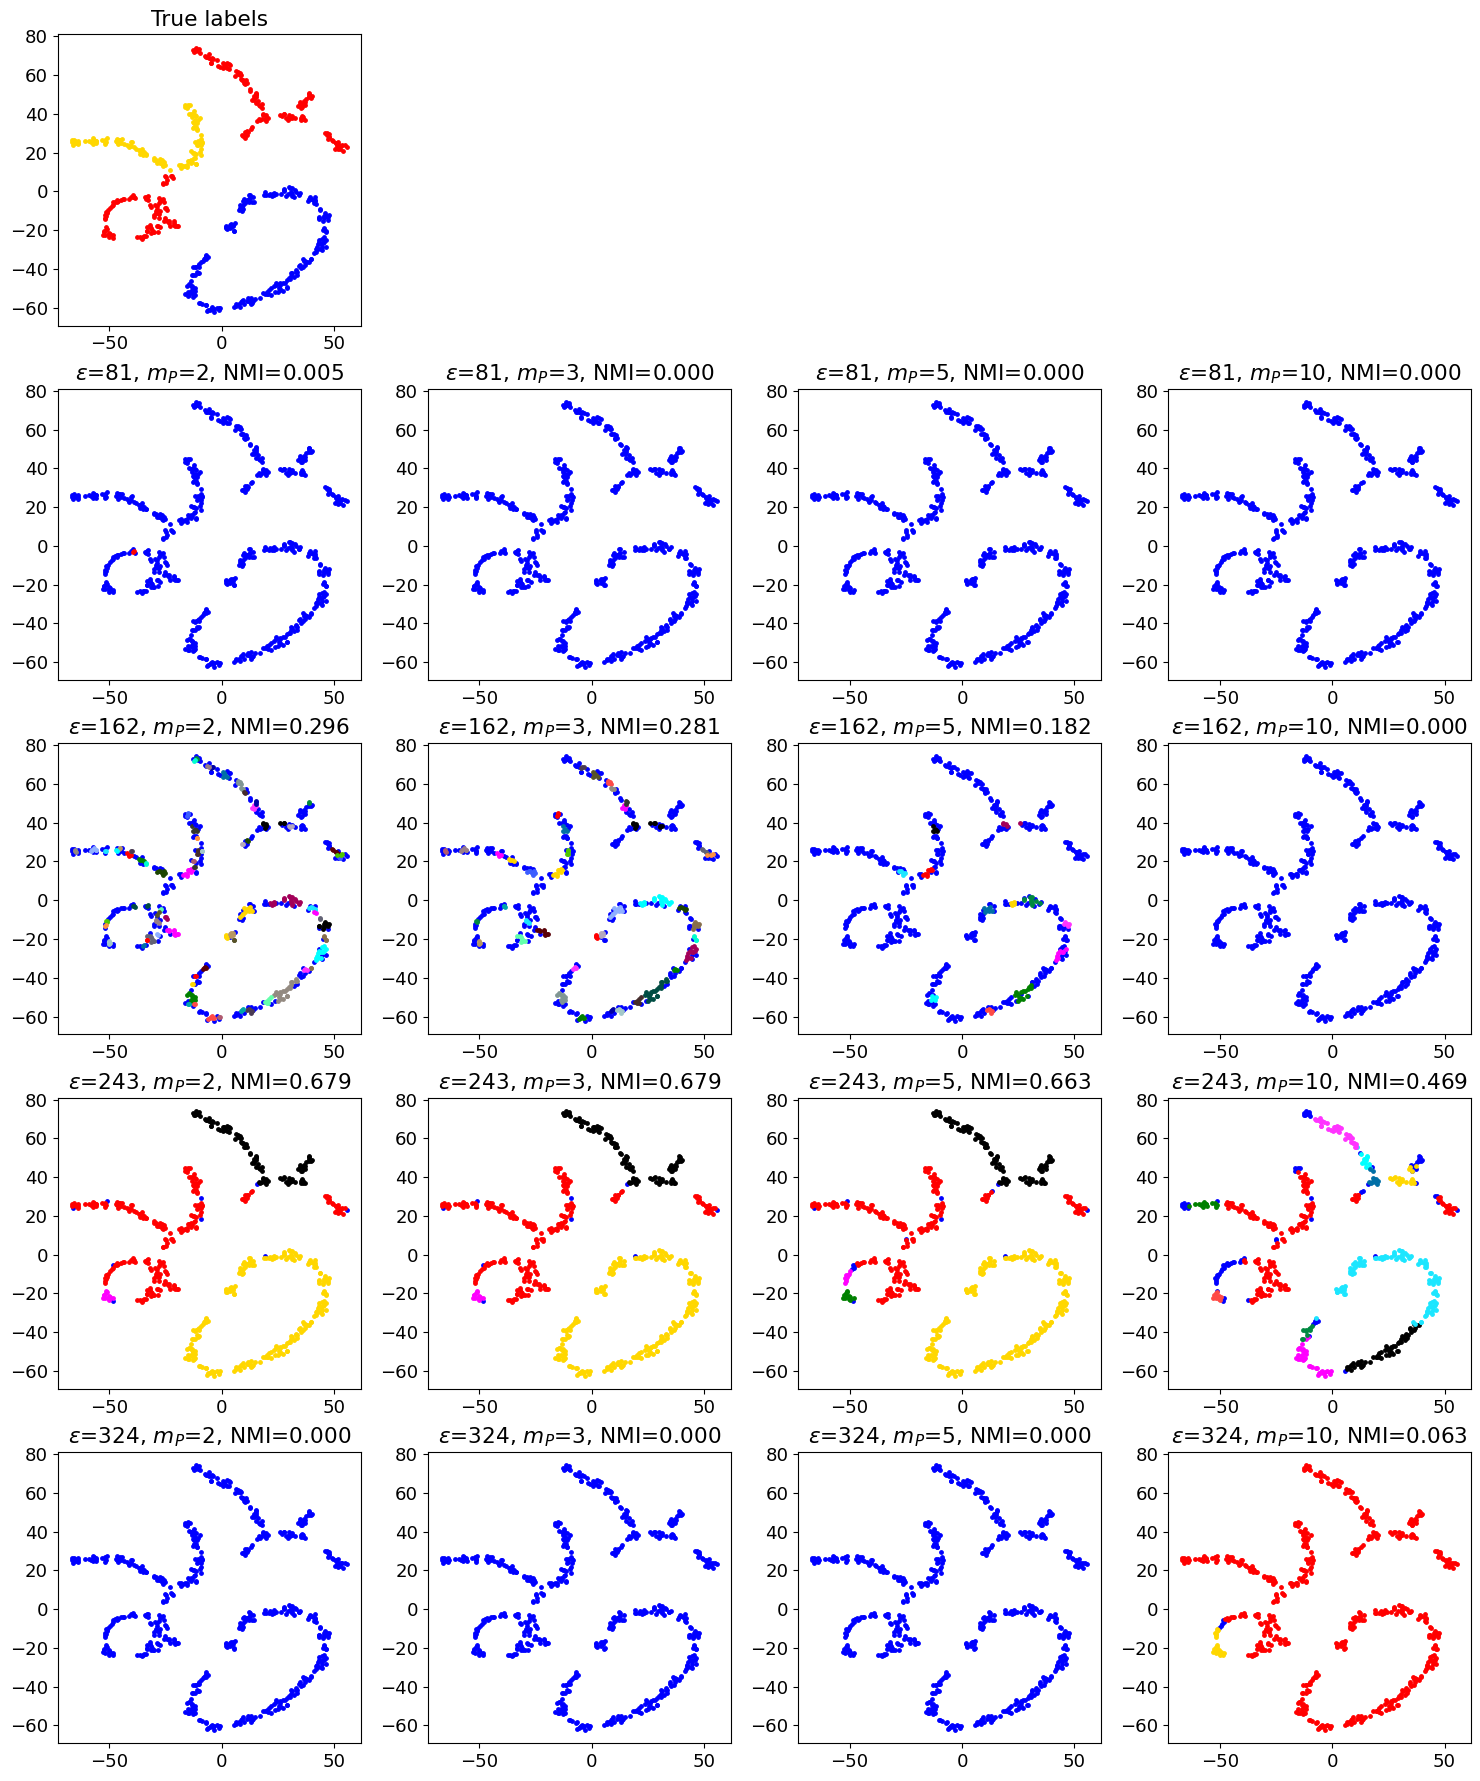

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[2] # best(?) visualization above
X = data
y_true = y

#eps_range = [0.01,0.1,0.5,1.0,10.]
if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)
eps_range = [r/2,r,1.5*r,2*r]

min_sample_range = [2,3,5,10]
DIMY=len(eps_range)
DIMX=len(min_sample_range)
fig, ax = plt.subplots(DIMY+1,DIMX,figsize=(15,18))

i,j=0,0
nmi=1
plotting_ax(X2D,y,ax[i,j])
ax[i,j].set_title('True labels')
for j in range(1,DIMX): fig.delaxes(ax[i,j])
    
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        plotting_ax(X2D,y_hat,ax[i+1,j])
        nmi=NMI(y_hat, y_true)
        ax[i+1,j].set_title(r'$\epsilon$=%.0f, $m_P$=%i, NMI=%.3f'%(eps,min_samples,nmi))

plt.tight_layout(h_pad=0.5)
plt.show()


## 1. 1. “eps” (ε) and “minPts” (mP) in DBSCAN algorithm for clustering

In [7]:
#We calculate min and max distance between points, and also the maximum distance of a point to its closest one (r_maxmin).
mindistances=[ min([distance(A,B) for A in x if not np.array_equal(A,B)]) for B in x]
distances=[distance(A,B) for A in x for B in x if not np.array_equal(A,B)]
r_min,r_maxmin=min(mindistances), max(mindistances)
r_max=max(distances)
print(r_min, r_maxmin, r_max)

73.68443825583488 254.30315994938374 2418.6729213912367


In [45]:
def nmi(pts, eps):
    model = DBSCAN(eps=eps, min_samples=pts)
    model.fit(data)
    y_hat = model.labels_
    nmi=NMI(y_hat, y_true)
    return nmi

In [46]:
def plot_heatmap(x,y,f):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Compute f(x, y) for each combination of x and y
    X, Y = np.meshgrid(x, y)
    Z = np.array([f(x,y) for (x,y) in zip(X,Y)])

    # Create a colormap using Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(Z, cmap='viridis', xticklabels=x, yticklabels=y)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Colormap of f(x, y)')
    plt.show()


In [47]:
pts=np.arange(1, 50, 1)
eps=np.linspace(r_min, 500, 100)
plot_heatmap(pts, eps, mni)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5.08333216e+02  3.85032834e+02 -3.98467665e+02  8.46520493e+02
  2.74019065e+02 -2.88727350e+02  7.32520294e+01  2.83563164e+02
 -6.45908720e+02 -5.39647205e+02  8.95060978e+02 -2.36960767e+02
 -3.03758129e+02 -1.24130231e+00 -2.01143927e+02  1.02999755e+02
 -2.22397406e+02 -3.05156598e+02  5.41990259e+02 -5.04137741e+02
 -2.47983032e+02 -5.33393267e+02  3.55393203e+02  6.01063010e+02
  7.15606516e+02 -5.79911159e+02 -6.79180508e+02  4.49594849e+02
 -3.03687289e+02 -3.72632713e+02  2.39502446e+02 -9.80729734e+01
  5.21947021e+02  5.45572218e+02 -4.31573532e+02  2.61276637e+02
  4.66502305e+02  6.49707015e+02 -2.61451634e+02 -9.49720265e+02
 -5.40213382e+02 -3.23029996e+02  3.32956393e+02 -1.09918037e+03
  1.25727948e+03 -6.83049716e+02  3.14450705e+02 -5.43460857e+01
  2.38587368e+02  1.27997762e+03  6.22026277e+02  3.37132701e+02
  5.41277785e+02 -5.78068898e+02  4.18520986e+02  1.17345026e+03
  3.81984507e+01 -5.81694646e+02  7.09249460e+02  4.03782344e+02
 -2.63024139e+02 -4.75241924e+02 -5.26567955e+02  8.18746282e+02
 -2.80343854e+02  8.57211179e+02  8.16945777e+01 -2.66868688e+02
 -5.39422365e+02 -2.45038051e+02 -2.45404154e+02 -2.60672348e+02
  5.49367341e+02  5.98283416e+02 -8.27431021e+02 -6.13558788e+02
  1.06945798e+03 -2.80490673e+01 -4.58647585e+01  4.07773464e+02
 -3.68998532e+02  1.28449953e+03 -6.93759160e+02 -5.84231529e+02
  4.76452183e+02 -7.32096717e+02  1.23073706e+03 -5.20546883e+02
 -3.79627263e+02 -9.50334823e+02  3.46611324e+02 -3.21929063e+02
  7.67213607e+02 -8.21219888e+02  1.82617252e+02 -2.97116373e+02
 -3.76761665e+02  8.98112516e+01  5.23185269e+02  4.62478699e+02
 -5.91318398e+02  8.76389495e+02 -6.98603281e+02  3.45316516e+02
 -8.21069730e+01 -6.74832096e+02 -5.20684359e+02  2.63923742e+02
 -3.03056219e+02  8.73412099e+02  1.10749899e+01 -7.59318024e+02
 -4.16527034e+02  1.50633473e+02 -6.89268000e+02  4.72980831e+02
  1.61960393e+02 -7.15477179e+02 -2.09908412e-01 -6.31740451e+01
  4.52823182e+02  2.61503290e+02 -2.76357345e+00  2.99581659e+02
 -2.30088338e+02  7.67343268e+02 -1.64564021e+02 -7.41113335e+02
 -4.28076759e+02  8.87670412e+02  6.27940134e+02  3.65660157e+02
 -5.58353275e+02 -2.27285501e+01 -8.64282797e+02  6.76576499e+02
 -1.02275345e+03  4.72481389e+02 -1.54980608e+02  6.74054950e+02
 -5.20572545e+02  4.87864745e+02  7.64152052e+02 -1.08066823e+03
 -6.99035743e+02  1.94368659e+02  7.37569196e+02  9.75607051e+02
  5.50135778e+02  1.46468960e+02 -6.63251120e+02  8.72211569e+02
  1.25883236e+03 -1.88192702e+02 -6.67437453e+02  2.70573650e+02
 -2.06911211e+02 -2.11740425e+02  8.69074430e+02  1.15433771e+03
  5.43332779e+02  7.03808555e+01 -3.97775281e+02 -7.02373622e+02
  6.07825359e+01  1.19581046e+03  4.71622412e+02 -6.10589092e+02
  9.86294265e+02  5.86888559e+01 -9.05593872e+02 -3.16893417e+02
 -4.76819525e+02  1.15198682e+03 -1.28034705e+02  1.24087248e+02
  3.19355607e+01  8.50030214e+02  4.60387967e+02  4.33500779e+02
  2.87441753e+02  4.01483030e+02  5.94325035e+02  8.63707352e+02
  5.22122535e+02 -6.79759814e+02  6.24139798e+02 -1.08219629e+03
 -4.14894372e+02  8.03588969e+02 -4.71290414e+02 -1.08815321e+03
 -3.24254743e+02 -6.14822265e+02 -7.20868802e+02  7.03339658e+02
  8.83073797e+02 -2.22400041e+01  9.29090896e+02  4.45905017e+02
  4.81707128e+02  5.10997929e+02  3.67676334e+02  8.59317181e+02
 -1.95976524e+02 -7.21332291e+02  6.03654060e+02 -8.18442828e+02
  1.00950435e+02  3.96076101e+02 -1.07032002e+03  7.01380261e+01
  1.16925304e+02  5.56527232e+02 -1.04856835e+03 -1.07724695e+03
 -5.20348505e+02 -6.05784740e+02 -1.86084730e+02 -1.10321738e+03
  4.90979109e+02 -5.94144032e+02 -7.14759718e+02  3.91039818e+02
 -8.45812452e+02  1.10296712e+03  1.87418543e+02  2.28961059e+02
  8.56788203e+01 -4.13810054e+02  2.03423868e+02  4.99596897e+02
 -3.69784635e+02 -8.63724049e+02 -3.06761435e+02  1.17260124e+02
  8.85720977e+02 -3.21996556e+02  7.66515756e+01 -3.26909614e+02
  1.03297354e+02  6.35851649e+02 -5.88604408e+01  6.43343906e+02
  5.54423612e+02 -9.71873960e+02 -6.23162803e+02 -5.02921590e+02
 -6.11950526e-01  2.14985520e+02  3.50208103e+02  7.00055767e+02
  4.27981548e+01 -9.36246126e+02 -3.29239704e+02  1.11260002e+03
  6.40817980e+02  5.21524769e+02  8.81356778e+02 -2.91020310e+02
 -3.89208329e+02  4.61701874e+02 -7.14767128e+02  1.28212877e+02
 -7.66934824e+02 -1.93484622e+02 -6.61922438e+02  4.92238857e+02
  4.98938254e+02 -4.82559919e+02  3.47035970e+01 -1.89504607e+02
 -3.48796947e+02 -8.50268433e+02 -1.09600944e+03  5.75525012e+02
 -8.31084424e+02  5.04851975e+02  9.66596686e+01  4.91038434e+02
 -2.05230303e+02  4.47596042e+02 -2.29963234e+01  8.23168701e+02
  1.18891562e+02 -1.04362528e+03  2.21555484e+02  8.99122092e+02
  8.69304307e+02 -6.25932495e+02 -9.24266038e+02 -2.45731690e+02
  8.77606737e+02 -8.33145866e+02  1.26397977e+03  2.26096305e+02
  8.22857862e+02 -5.90445340e+02 -3.72564191e+01 -5.03729517e+02
  8.40385130e+02 -1.08964928e+03  5.90076980e+02 -1.99452413e+02
 -5.59078406e+02  8.03443779e+01  1.45078115e+02 -4.98716335e+02
 -3.64299748e+02 -6.45986230e+01 -1.90558875e+02 -4.73120089e+02
 -6.61920550e+02 -3.74819796e+02 -6.43551429e+02 -4.58432521e+02
  4.25181311e+02  6.53282179e+02 -1.62305009e+02  6.65498151e+02
 -3.45113189e+02  5.01073505e+02 -2.49802896e+02 -1.30806951e+02
  7.66198581e+01 -5.61259743e+02  4.26451960e+02 -4.65152557e+02
  5.80905993e+02 -3.02915326e+02 -6.68333172e+02  2.73589002e+02
 -3.95973129e+02 -2.82252370e+02  8.16965605e+02  2.88760209e+02
  4.27000488e+02  2.17899087e+02  2.71957480e+02 -3.48853636e+02
  4.86840895e+02  8.61630988e+02 -3.60369555e+02  8.59864679e+02
  4.18426037e+02  1.15469180e+02 -4.08859786e+02  2.94587959e+02
 -7.01569923e+02 -8.36054862e+02  7.32511516e+02 -6.97177055e+02
  7.26742475e+02  2.74402214e+02  1.02767109e+02 -1.00541402e+03
 -6.75106848e+02 -3.91151235e+01  5.67504444e+02 -2.51006783e+02
  4.58030057e+02  4.03624418e+02 -9.95830569e+02 -5.46185020e+02
  5.22077147e+02 -5.28532872e+02 -8.52403181e+01  6.29198040e+01
  3.46540627e+02  2.07107747e+02 -3.60853516e+02  4.78373276e+02
  1.04990658e+03  6.11146840e+02  1.09914557e+03  3.74523600e+01
 -1.10878370e+03 -6.86881394e+02 -8.79913976e+02 -5.65340096e+02
 -2.16053457e+02 -5.62434154e+02  4.76917361e+02 -6.44672615e+02
  3.80431368e+02 -1.10291799e+03  5.19838621e+02 -5.93348896e+02
  8.62509295e+02 -4.81008808e+02 -8.98651394e+02 -2.12846519e+02
 -5.87504733e+01  1.00445031e+02  6.11443560e+02  9.66575687e+01
 -7.50967274e+02  4.24134558e+02 -1.09650808e+03 -6.76867296e+02
 -5.48478243e+02  1.10289465e+02  5.14788913e+02  1.54084446e+02
 -7.72902028e+02  3.39283611e+02 -6.18190391e+02 -3.80920536e+02
 -3.91655856e+02 -1.37426280e+02 -3.59359383e+02 -4.42368450e+02
 -4.64787360e+02 -1.96434028e+02  7.28782648e+02  3.97779085e+02
  8.89722005e+02 -6.15373978e+02 -9.83531582e+02  8.90054396e+02
  4.29138031e+02  5.76096411e+02 -6.23924079e+02  5.36660796e+02
  9.18689092e+02 -7.38102537e+01  4.86183976e+02 -2.67854107e+02
  1.30143396e+02 -7.10697330e+02  2.15468962e+02  3.05777981e+02
 -2.09797454e+02  5.09344697e+02 -3.46727133e+02 -9.82000512e+01
 -7.17099954e+02  4.86054247e+02  1.22436562e+02  8.62644913e+02
  3.34985781e+01 -6.57746174e+02  1.44258673e+01  8.77363416e+02
 -5.18171375e+02  1.48962647e+02 -3.10849130e+02  5.48633026e+02
  5.23205143e+02 -1.02745124e+02  4.41666918e+02 -2.09503678e+02
 -8.47587388e+02 -5.58024454e+02  7.14537895e+01  5.14163993e+01
 -7.79857162e+02 -1.00948014e+03 -6.51130528e+02  1.41111923e+02
 -6.78738037e+02  3.27268401e+02  6.26499819e+01  1.70715697e+02
  1.32474691e+02 -2.41060915e+02 -6.52939732e+02  8.81616360e+02
 -8.77853127e+01  7.21417935e+01  3.43447958e+02 -3.07872048e+02
  1.27812053e+03 -3.35335744e+02  4.63334144e+02  1.09930139e+03
 -1.07092044e+03 -3.20446049e+02  6.26899293e+02  9.89149078e+01
  4.93775403e+02  8.91090854e+02  8.25004503e+02 -1.52370364e+01
 -5.19833698e+02 -5.54339816e+02  1.65245207e+02 -2.24172801e+02
 -6.62323617e+02  5.92384384e+02 -8.05513486e+01  3.77404077e+02
 -9.45786026e+00  6.44365743e+02  5.88327236e+02 -7.05359412e+02
 -8.46291598e+02 -8.83432682e+02  6.53179317e+02 -1.15363746e+02
  6.51435028e+02  2.86461866e+02 -7.17935563e+02 -1.61171350e+02
 -2.78587781e+02 -3.82764851e+02 -2.15725817e+02  1.17774944e+03
 -3.57103161e+02 -6.57926131e+01 -6.72186272e+02 -4.53387654e+02
 -6.83458016e+02 -1.02973360e+03  3.76876297e+02 -8.30944831e+02
  8.52594730e+02  2.95237208e+02  8.65074021e+02  4.72214292e+02
  1.07228591e+02 -8.41903359e+02 -6.28911887e+02 -6.95712136e+02
  7.23820709e+01 -3.64632120e+02 -7.52214097e+02  9.12790059e+02
 -4.06028265e+02 -7.19890759e+02 -4.40946110e+02  1.01928754e+02
 -3.00701670e+02 -6.98301699e+02  8.46923981e+02 -1.41720138e+01
  3.00265563e+02 -3.23386554e+02  3.29597397e+02 -1.83446694e+02
  1.23795845e+01  4.33084488e+02  1.25488774e+03 -3.05573819e+02
  2.65615525e+02  8.75607263e+02 -4.74727839e+02 -6.99977734e+02
  5.39292983e+02  3.57114324e+02 -1.10568908e+03  1.18695573e+03
  3.10655401e+02  5.11629404e+02  3.24679897e+01 -2.29944431e+02
  5.47554332e+02 -1.72446478e+02  8.12742625e+02 -5.09808234e+02
 -2.43384129e+01  3.54693634e+02  2.02929258e+02  1.05683276e+03
 -7.07616146e+02 -3.34710716e+02  1.09671570e+03 -1.28680441e+02
 -6.77933521e+02 -3.67473181e+02 -2.53549244e+02  1.14995139e+03
  2.80629370e+02 -8.03457655e+01 -9.25880255e+02 -2.39708828e+02
 -5.07335101e+02 -1.06870550e+03  7.79065694e+01  4.53869067e+02
  8.30110007e+02  6.55306925e+02  3.09267194e+01 -7.20248603e+02
 -5.22580517e+02 -9.45371640e+01 -6.41084476e+02 -1.06085963e+03
 -1.59665662e+02  3.90739817e+02  3.37430576e+02 -1.10837267e+03
  8.36014423e+01  3.10803442e+02 -2.48430667e+02  8.95023460e+02
  4.84964815e+02 -2.95912746e+02  4.93843447e+02 -6.04039974e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

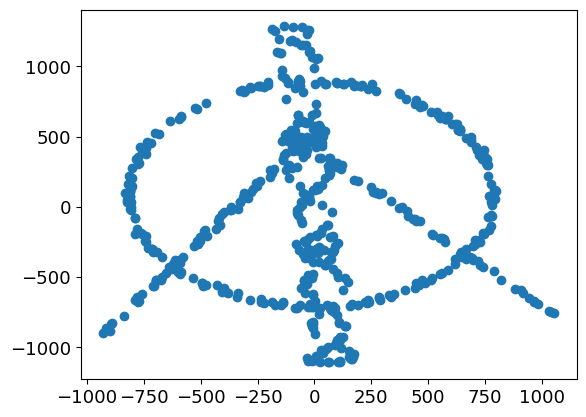

In [39]:
plt.show()
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(x)
x_reduced= pca.transform(x)
plt.scatter(x_reduced[:,1], x_reduced[:,0])

## 2. Understanding the 12-dimensional data

variance explained with 3 components: 96.28198985565814%


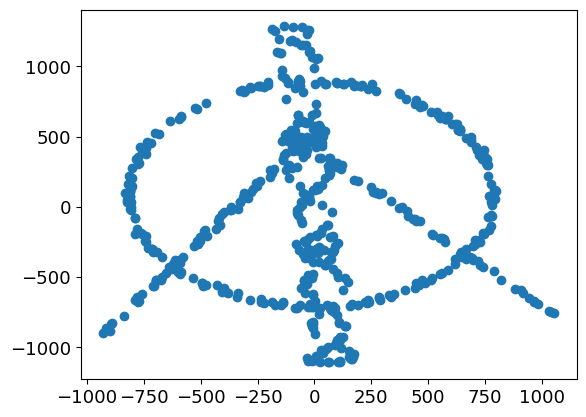

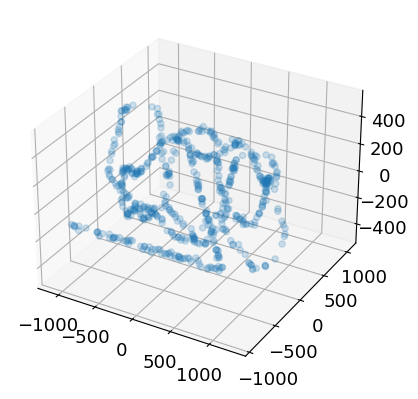

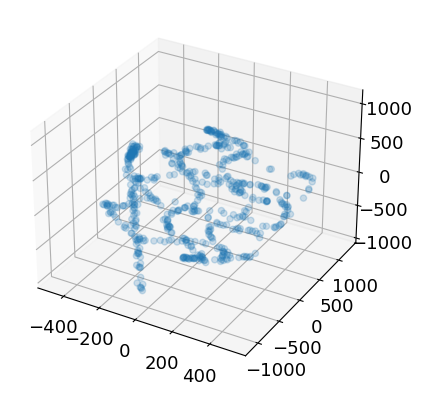

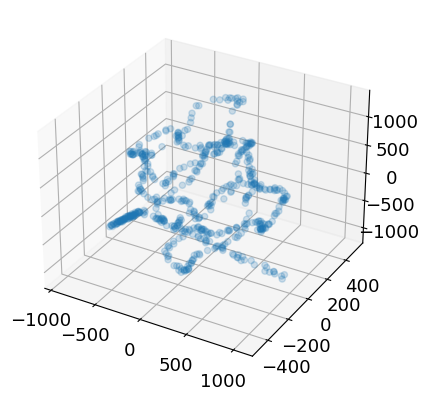

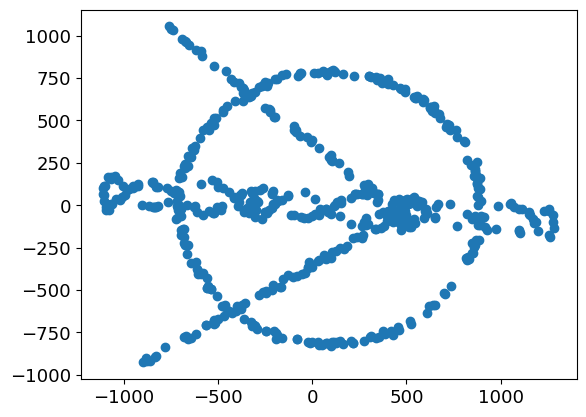

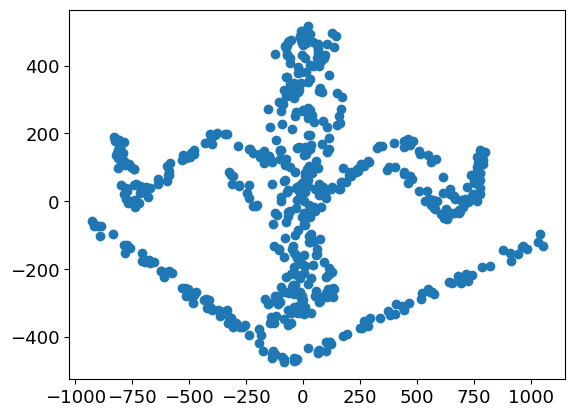

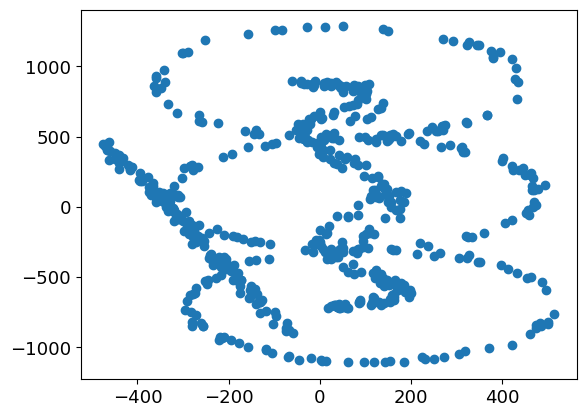

In [11]:
n_comp=3
plt.show()
from sklearn.decomposition import PCA
pca= PCA(n_components=n_comp)
pca.fit(x)
x_reduced= pca.transform(x)
print(f'variance explained with {n_comp} components: {sum(pca.explained_variance_ratio_*100)}%')
plt.scatter(x_reduced[:,1], x_reduced[:,0])
plt.show()

X,Y,Z=x_reduced[:,0],x_reduced[:,1], x_reduced[:,2]
ax=plt.figure().add_subplot(projection='3d')
ax.scatter(X,Y,Z, alpha=0.2)
plt.show()
ax=plt.figure().add_subplot(projection='3d')
ax.scatter(Z,X,Y, alpha=0.2)
plt.show()
ax=plt.figure().add_subplot(projection='3d')
ax.scatter(Y,Z,X, alpha=0.2)
plt.show()

plt.scatter(X,Y)
plt.show()
plt.scatter(Y,Z)
plt.show()
plt.scatter(Z,X)
plt.show()

## 3. Compare different clustering methods

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans(x_reduced)

TypeError: 'KMeans' object is not callable